In [81]:
import numpy as np
import scipy.fftpack as sfft
from ncempy import io
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.signal import convolve2d as cv2

In [34]:
"""
loaded_data = io.dm.dmReader("EFTEM-SI_01 [0,35] eV.dm4")
data_cube = loaded_data["data"]
np.save("data/uncor_eftem_stack", data_cube)
"""

'\nloaded_data = io.dm.dmReader("EFTEM-SI_01 [0,35] eV.dm4")\ndata_cube = loaded_data["data"]\nnp.save("data/uncor_eftem_stack", data_cube)\n'

In [48]:
eft_stack = np.load("data/uncor_eftem_stack.npy")

fig = plt.figure()
fig.set_size_inches((12,6))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2, projection="3d")

tmp = np.arange(2)
xtmp, ytmp = np.meshgrid(tmp,tmp)
slicetmp = 0*xtmp*ytmp + 1

x = np.arange(2048)

def init():
    ax1.set_title("X-Y data per slice")
    ax1.set_xlabel("x")
    ax1.set_ylabel("y")
    ax1.pcolorfast(x, x, eft_stack[0,:,:])
    ax2.contourf(xtmp, ytmp, slicetmp, zdir="z", offset=0, cmap="gray")
    ax2.set_zlim(0,72)

def animate(i):
    ax1.pcolorfast(x, x, eft_stack[i,:,:])
    ax1.text(0,0, "Slice: "+str(i))
    ax2.clear()
    ax2.set_zlim(0,72)
    ax2.contourf(xtmp, ytmp, slicetmp, zdir="z", offset=i, cmap="gray")

anim = FuncAnimation(fig, animate, init_func=init, frames=70, interval=20)
anim.save("slices.gif");

<img src="slices.gif" />

In [115]:
def get_drift(image0, image1):
    form = image0.shape

    image0_transform = sfft.fftshift( sfft.fft( image0 ) )
    image1_transform = sfft.fftshift( sfft.fft( image1 ) )

    cross_pow_spec = (image0_transform * image1_transform.conj())/( np.abs(image0_transform * image1_transform.conj() ) )
    cross_cor = sfft.ifftshift( np.abs( sfft.ifft2(  cross_pow_spec  ) ) )

    shift = np.unravel_index( np.argmax( cross_cor ), form )

    return shift

In [121]:
edge_x = np.array([
    [-1,0,1],
    [-1,0,1],
    [-1,0,1]
])

edge_y = np.array([
    [1,1,1],
    [0,0,0],
    [-1,-1,-1]
])

def develop(image):
    new_image = np.copy(image)[:,:]
    a = np.average(new_image)
    b = np.std(new_image)
    to_return =  np.sqrt(cv2(1/(1+np.exp(-(new_image-a)/b))*np.hamming( new_image.shape[0] ), edge_x)**2 + cv2(1/(1+np.exp(-(new_image-a)/b))*np.hamming( new_image.shape[0] ), edge_y)**2)
    plt.imshow(to_return)
    return to_return

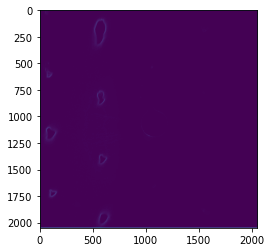

In [108]:
plt.imshow( develop(eft_stack[7] ) )

In [86]:
for i in range(0,eft_stack.shape[0]-1):
    drift = get_drift(develop(eft_stack[0]),develop(eft_stack[i]))
    print(drift)

(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)


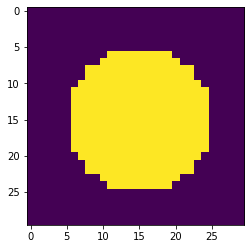

In [109]:
x = np.arange(51)-25
imgx, imgy = np.meshgrid(x, x)

dot = (np.sqrt(imgx**2 + imgy**2) < 10)[10:40,10:40]

plt.imshow(dot)

In [127]:
test_image0 = 0*imgx*imgy
test_image0[0:30,0:30] = dot
test_image1 = 0*imgx*imgy
test_image1[15:45,10:40] = dot

(27, 27)


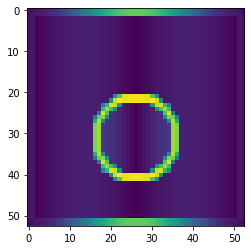

In [128]:
shift =  get_drift(develop(test_image0), develop(test_image1))
print(shift)

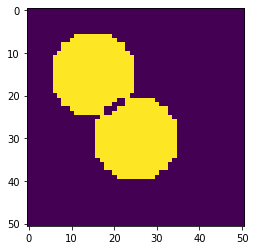

In [129]:
plt.imshow(np.abs(test_image0 - test_image1))

In [137]:
def drift(img0, img1):
    img0_win = img0*np.hanning( img0.shape[0] )
    img1_win = img1*np.hanning( img1.shape[0] )
    img0_ftm = sfft.fft2( img0_win )
    img1_ftm = sfft.fft2( img1_win )

    cross_power_spectrum = (img0_ftm * img1_ftm.conj()) / np.abs(img0_ftm * img1_ftm.conj())
    r = np.abs( sfft.ifft2( cross_power_spectrum ) )
    r = sfft.fftshift( r )
    plt.imshow(r)

    [py,px] = np.argwhere(r==r.max())[0]
    return [py,px]

10 15


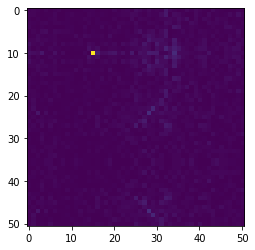

In [132]:
[x,y] = drift(test_image0, test_image1)
print(x,y)

1024 1024
1024 1024
1024 1024
1024 1024
1024 1023
1024 1024
1024 1024
1024 1024
1024 1024
1891 1440
1024 1024
1024 1024
1024 1024
1024 1024
1024 1024
1024 1024
1024 1024
1024 1024
1024 1024
1024 1024
1024 1024
1024 1024
1024 1024
1024 1024
1024 1024
1024 1024
1024 1024
1024 1024
1024 1024
1024 1024
1024 1024
1024 1024
1024 1024
1024 1024
1024 1024
1024 1024
1024 1024
1024 1024
1024 1024
1024 1024
1024 1024
1024 1024
1024 1024
1024 1024
1024 1024
1024 1024
1024 1024
1024 1024
1024 1024
1024 1024
1024 1024
1024 1024
1024 1024
1024 1024
1024 1024
1024 1024
1024 1024
1024 1024
1024 1024
1024 1024
1024 1024
1024 1024
1024 1024
1024 1024
1024 1024
1024 1024
1024 1024
1024 1024
1024 1024
1024 1024


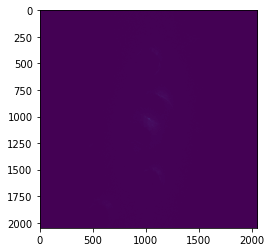

In [140]:
for i in range(0,eft_stack.shape[0]-1):
    [x,y] = drift(eft_stack[0],eft_stack[i+1])
    print(x,y)